In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv('/content/Month_Value_1.csv')
df.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


##handle datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    96 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     float64
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [10]:
df['Period'] = pd.to_datetime(df['Period'], format="%d.%m.%Y")
df = df.set_index('Period')
df.head()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0
2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0
2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0
2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2015-01-01 to 2022-12-01
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Revenue                                   64 non-null     float64
 1   Sales_quantity                            64 non-null     float64
 2   Average_cost                              64 non-null     float64
 3   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4)
memory usage: 3.8 KB


## handle missing and duplicates


In [12]:
df.isnull().sum()

,0
Revenue,32
Sales_quantity,32
Average_cost,32
The_average_annual_payroll_of_the_region,32


In [13]:
df = df.interpolate(method="linear")

In [14]:
df.isnull().sum()

,0
Revenue,0
Sales_quantity,0
Average_cost,0
The_average_annual_payroll_of_the_region,0


In [15]:
df.duplicated().sum()

np.int64(32)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

np.int64(0)

## export cleaned dataset

In [21]:
df.to_csv("cleaned_time_series.csv")

##EDA

### Revenue Over Time

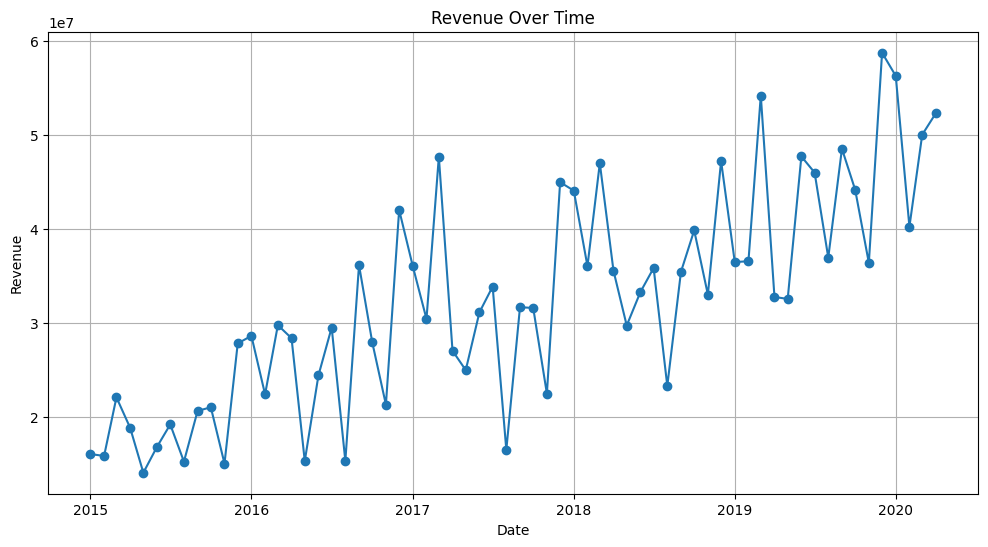

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Revenue'], marker='o')
plt.title("Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

### sales quantity over time

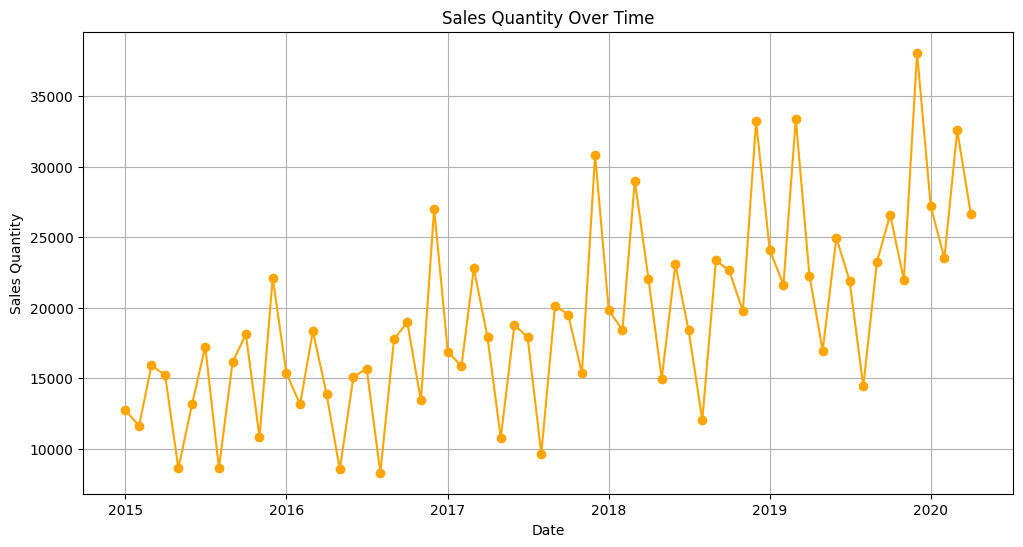

In [20]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Sales_quantity'], color="orange", marker='o')
plt.title("Sales Quantity Over Time")
plt.xlabel("Date")
plt.ylabel("Sales Quantity")
plt.grid(True)
plt.show()